In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
pd.set_option('plotting.backend', 'plotly')

In [3]:
df=pd.read_excel("../data/Trader Stores.xlsx",index_col=0)
df

,Customer Name,Segment,City,State,Region,Product ID,Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,
1,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9990,Tom Boeckenhauer,Consumer,Miami,Florida,South,FUR-FU-10001889,Furniture,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9991,Dave Brooks,Consumer,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9992,Dave Brooks,Consumer,Costa Mesa,California,West,TEC-PH-10003645,Technology,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932


In [4]:
df['Product Name'].nunique()

1850

In [5]:
df.drop(columns=["Customer Name","Product ID","Product Name"],inplace=True)

In [9]:
def make_plot_and_save(arr, plot,file="plot.png"):
    BASE_PATH="../output"
    file_path=os.path.join(BASE_PATH,file)
    img=plot(arr)
    img.set(title=file)
    img.get_figure().savefig(file_path)
    return img

C:\Users\Ashwin\miniconda3\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Segmentwise Orders'}, xlabel='Segment', ylabel='count'>

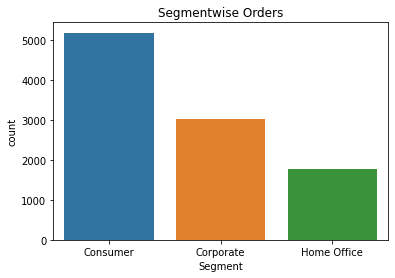

In [10]:
make_plot_and_save(df['Segment'],sns.countplot,"Segmentwise Orders")

C:\Users\Ashwin\miniconda3\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Regionwise Orders'}, xlabel='Region', ylabel='count'>

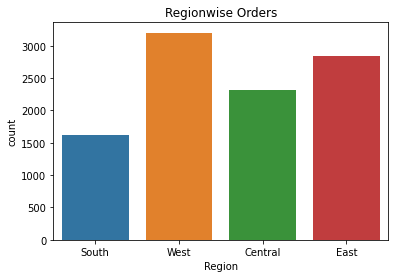

In [11]:
make_plot_and_save(df['Region'],sns.countplot,"Regionwise Orders")

C:\Users\Ashwin\miniconda3\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Categorywise Orders'}, xlabel='Category', ylabel='count'>

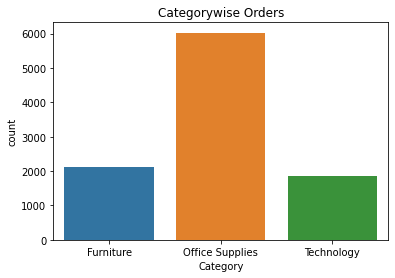

In [12]:
make_plot_and_save(df['Category'],sns.countplot,"Categorywise Orders")

In [ ]:
segment_df

,Sales,Quantity,Discount,Profit
Segment,,,,
Consumer,1.169598e+06,19818,820.91,134119.2092
Corporate,7.586536e+05,11804,477.85,91979.1340
Home Office,4.296531e+05,6744,262.33,60298.6785


In [14]:
segment_df=df.groupby("Segment").sum()

C:\Users\Ashwin\miniconda3\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


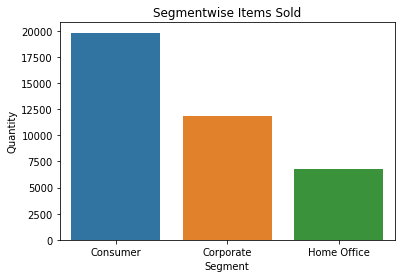

In [16]:
plot=sns.barplot(segment_df.index,segment_df['Quantity'])
plot.set(title="Segmentwise Items Sold")
plot.get_figure().savefig("../output/Segmentwise Items Sold")

C:\Users\Ashwin\miniconda3\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


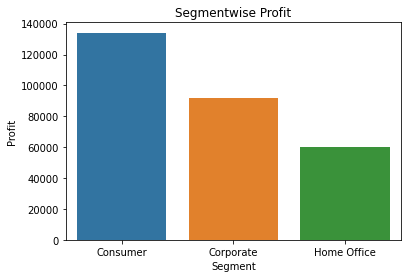

In [18]:
plot=sns.barplot(segment_df.index,segment_df['Profit'])
plot.set(title="Segmentwise Profit")
plot.get_figure().savefig("../output/Segmentwise Profit")

C:\Users\Ashwin\miniconda3\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


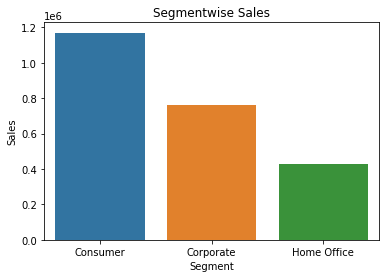

In [19]:
plot=sns.barplot(segment_df.index,segment_df['Sales'])
plot.set(title="Segmentwise Sales")
plot.get_figure().savefig("../output/Segmentwise Sales")

C:\Users\Ashwin\miniconda3\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


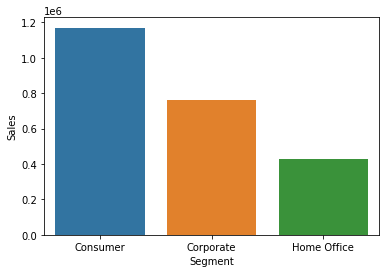

In [ ]:
sns.barplot(segment_df.index,segment_df['Sales']).get_figure().savefig("../output/Segmentwise Sales")

In [21]:
region_df=df.groupby("Region").sum()

In [22]:
region_df

,Sales,Quantity,Discount,Profit
Region,,,,
Central,501239.8908,8780,558.34,39706.3625
East,739485.2500,11111,414.00,91522.7800
South,391721.9050,6209,238.55,46749.4303
West,725457.8245,12266,350.20,108418.4489


C:\Users\Ashwin\miniconda3\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ashwin\miniconda3\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ashwin\miniconda3\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

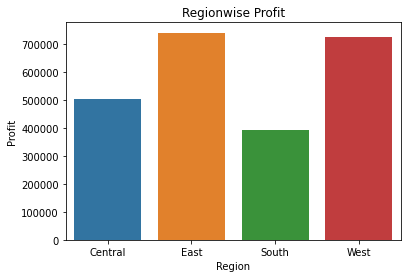

In [23]:
plot=sns.barplot(region_df.index,region_df['Quantity'])
plot.set(title="Regionwise Items Sold")
plot.get_figure().savefig("../output/Regionwise Items Sold")

plot=sns.barplot(region_df.index,region_df['Sales'])
plot.set(title="Regionwise Sales")
plot.get_figure().savefig("../output/Regionwise Sales")

plot=sns.barplot(region_df.index,region_df['Profit'])
plot.set(title="Regionwise Profit")
plot.get_figure().savefig("../output/Regionwise Profit")

In [24]:
Category_df=df.groupby("Category").sum()

C:\Users\Ashwin\miniconda3\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ashwin\miniconda3\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ashwin\miniconda3\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

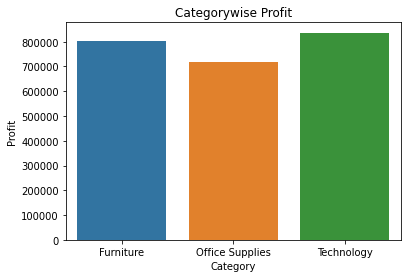

In [25]:
plot=sns.barplot(Category_df.index,Category_df['Quantity'])
plot.set(title="Categorywise Items Sold")
plot.get_figure().savefig("../output/Categorywise Items Sold")

plot=sns.barplot(Category_df.index,Category_df['Sales'])
plot.set(title="Categorywise Sales")
plot.get_figure().savefig("../output/Categorywise Sales")

plot=sns.barplot(Category_df.index,Category_df['Profit'])
plot.set(title="Categorywise Profit")
plot.get_figure().savefig("../output/Categorywise Profit")